In [8]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the figure suptitle
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.dt = dt    # Time step
        self.reset()

    def reset(self):
        self.voltage = 0.0  # Initial membrane potential

    def update(self, I):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = 0.0  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        spike = neuron.update(I)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


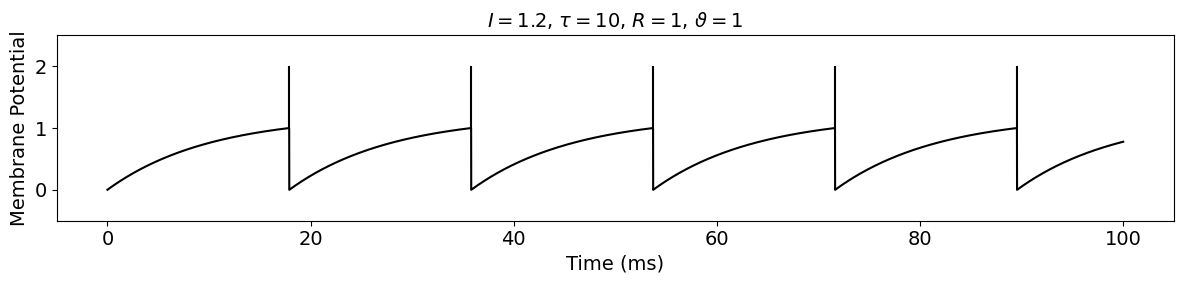

In [35]:
# Simulation parameters
tau = 10  # Membrane time constant (ms)
R = 1     # Membrane resistance
threshold = 1  # Firing threshold
sigma = 0  # Amplitude of the noise (in units of voltage)
dt = 0.01 # Time step (ms)
duration = 100  # Duration of simulation (ms)
I = 1.2  # Input current (arbitrary units)

spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, dt, duration)

plt.figure(figsize=(12, 3))
plt.vlines(spikes, ymin=1, ymax=2, colors='black', linestyles='-')
plt.plot(np.arange(0, duration, dt), voltages, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title(f'$I={I}$, $\\tau={tau}$, $R={R}$, $\\vartheta={threshold}$ ')
plt.ylim(-0.5, 2.5)
#plt.title('Membrane Potential over Time')

plt.tight_layout()
plt.savefig('u_deterministic.png')
plt.show()


# Subthreshold dynamics
- let's study the subthreshold dynamics by imposing a very high treshold that is never reached

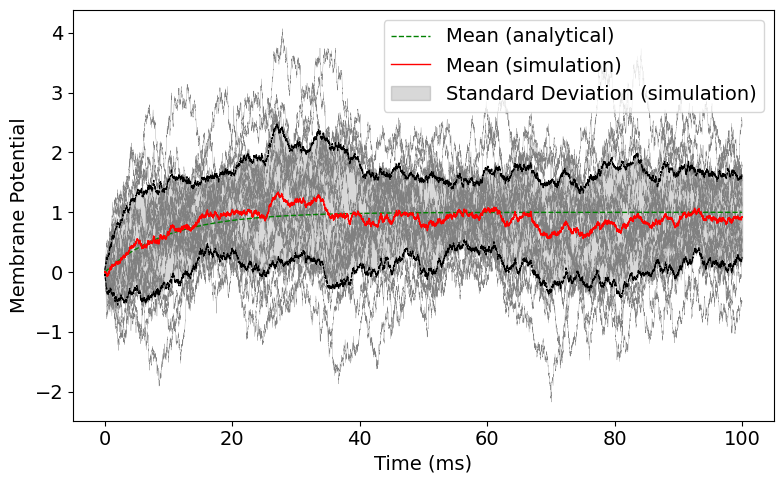

In [11]:
# Simulation parameters
tau = 10  # Membrane time constant (ms)
R = 1     # Membrane resistance
threshold = float('inf')  # Firing threshold
sigma = 0.4  # Amplitude of the noise (in units of voltage)
dt = 0.01 # Time step (ms)
duration = 100  # Duration of simulation (ms)
I = 1  # Input current (arbitrary units)

#number of trials
N_trials = 20

list = []
for i in range(N_trials):
    spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, dt, duration)
    list.append(voltages)

trials = np.stack(list)

plt.figure(figsize=(8, 5))
for i in range(N_trials):
    plt.plot(np.arange(0, duration, dt), trials[i], color='grey', linewidth=0.2)

mean = np.mean(trials, axis=0)
sd = np.std(trials, axis=0)



# Analitical results
t=np.arange(0, duration, dt)
uinf = R*I
u0 = uinf*(1-np.exp(-t/tau))
plt.plot(np.arange(0, duration, dt), u0, color='green', linestyle='dashed',  linewidth=1, label='Mean (analytical)')

variance=0.5*sigma**2*(1-np.exp(-2*t/tau))
#plt.plot(np.arange(0, duration, dt), u0+np.sqrt(variance), color='orange', linestyle='dashed',  linewidth=1)
#plt.plot(np.arange(0, duration, dt), u0-np.sqrt(variance), color='orange', linestyle='dashed',  linewidth=1)
#plt.fill_between(t, u0-np.sqrt(variance), u0+np.sqrt(variance), color='orange', alpha=0.3, label='Standard Deviation (analytical)')


plt.plot(t, mean, color='red', linewidth=1, label= 'Mean (simulation)')
plt.plot(t, mean+sd, color='black', linestyle='dashed',  linewidth=0.8)
plt.plot(t, mean-sd, color='black', linestyle='dashed',  linewidth=0.8)
plt.fill_between(t, mean - sd, mean + sd, color='grey', alpha=0.3, label='Standard Deviation (simulation)')


plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
#plt.title('Membrane Potential over Time')
plt.legend()
plt.tight_layout()
plt.savefig('u_multiple_simulations.png')
plt.show()
